<a href="https://colab.research.google.com/github/WilliamYkZhang/COMP551_A2/blob/master/feature_engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd 
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt

In [54]:
nltk.download("punkt")
nltk.download("stopwords")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
stemmed_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_SnowballStemmer.csv?token=AKKZG4FIMNL4RZOBOMSF2V25WNYXW")
# lemmatized_df = pd.read_csv("https://raw.githubusercontent.com/WilliamYkZhang/COMP551_A2/master/preprocessed_reddit_train_WordNetLemmatizer.csv?token=AKKZG4HQMPHQZO4UAY6WHHK5WNY6E")

In [0]:
def word_count(sentence):
  return len(word_tokenize(sentence))

def comment_length(sentence):
  return len(sentence)

In [0]:
# Number of word
stemmed_df["Word Count"] = stemmed_df["cleaned"].apply(word_count)

# Length of comments
stemmed_df["comment_length"] = stemmed_df["cleaned"].apply(comment_length)

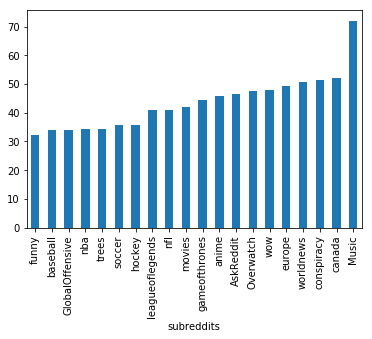

In [35]:
# Using plots to inspect correlation of the comment length and the subreddit category
# average_comment_length = pd.DataFrame(stemmed_df.groupby("subreddits").comment_length.mean())
average_word_count = stemmed_df.groupby("subreddits")["Word Count"].mean().sort_values(ascending=True)

# print(average_comment_length)
# print(average_word_count)
# print(average_comment_length.plot.bar())
average_word_count.plot.bar()

# plt.bar(average_word_count, average_word_count.index)
plt.savefig('Average word count per subreddit.png')

In [0]:
from sklearn.feature_extraction.text import CountVectorizer

c_vect = CountVectorizer(max_features=30000, lowercase=True, encoding="utf-8", decode_error="ignore", strip_accents='unicode',stop_words=stopwords.words('english'), analyzer = "word")

# Storing vocabulary for each subreddit into a list
vocabulary = []

# Find most frequent words for each subreddits 
for group in stemmed_df.groupby("label"):
    c_vect.fit(group[1].cleaned)
    vocabulary.append(c_vect.vocabulary_)



In [59]:
import collections

print(collections.OrderedDict(vocabulary[1]))

OrderedDict([('afraid', 468), ('get', 2482), ('addict', 436), ('fail', 2122), ('school', 4817), ('smthing', 5089), ('lol', 3356), ('fuckin', 2391), ('n0thing', 3713), ('one', 3942), ('tap', 5478), ('stand', 5228), ('take', 5471), ('shirt', 4936), ('straight', 5298), ('mean', 3499), ('mayb', 3495), ('point', 4238), ('play', 4210), ('stretch', 5315), ('resolut', 4624), ('whi', 6164), ('donat', 1777), ('notif', 3839), ('also', 523), ('af', 462), ('fair', 2124), ('igl', 2894), ('part', 4076), ('none', 3812), ('pronax', 4374), ('hell', 2739), ('yeah', 6336), ('final', 2222), ('hype', 2861), ('proud', 4387), ('imt', 2958), ('wreck', 6249), ('vp', 6077), ('home', 2795), ('soil', 5111), ('well', 6142), ('would', 6242), ('thought', 5583), ('week', 6134), ('ago', 478), ('brazilian', 990), ('team', 5499), ('sk', 5020), ('cs', 1475), ('drug', 1835), ('except', 2057), ('go', 2537), ('group', 2607), ('quarter', 4433), ('best', 857), ('gambit', 2437), ('hope', 2806), ('consid', 1364), ('amount', 546)

In [0]:
# Create scaler 
scaler = MinMaxScaler()

# Normalize word count
# stemmed_df["word_count"] = scaler.fit_transform(stemmed_df["word_count"].to_numpy().reshape(-1,1))
# stemmed_df["comment_length"] = scaler.fit_transform(stemmed_df["word_count"].to_numpy().reshape(-1,1))


In [0]:
stemmed_df.groupby("label").count()

,id,comments,subreddits,cleaned
label,,,,
0,3500,3500,3500,3500
1,3500,3500,3500,3500
2,3500,3500,3500,3500
3,3500,3500,3500,3500
4,3500,3500,3500,3500
5,3500,3500,3500,3500
6,3500,3500,3500,3500
7,3500,3500,3500,3500
8,3500,3500,3500,3500
